In [1]:
import cv2 as cv
import numpy as np
import pickle 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split



(255, 255, 3)


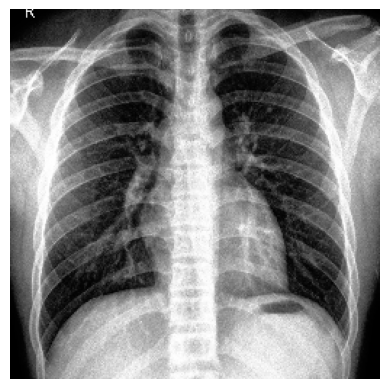

In [2]:
img=cv.imread("Covid19-dataset/train/Normal/08.jpeg")
img=cv.resize(img,[255,255])
print(img.shape)
plt.imshow(img)
plt.axis('off')  
plt.show()


(255, 255, 3)


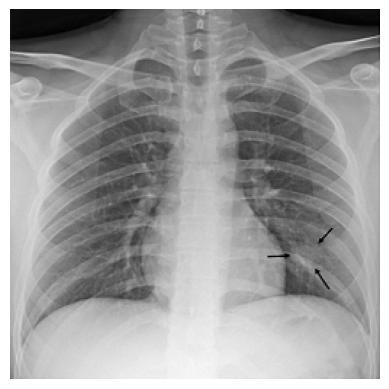

In [3]:

img=cv.imread("Covid19-dataset/test/Covid/0111.jpg")
img=cv.resize(img,[255,255])
print(img.shape)
plt.imshow(img)
plt.axis('off')  
plt.show()


(255, 255, 3)


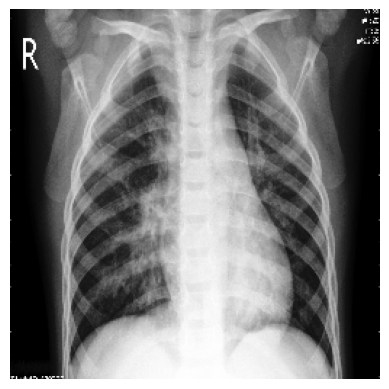

In [4]:
img=cv.imread("Covid19-dataset/train/Viral-Pneumonia/021.jpeg")
img=cv.resize(img,[255,255])
print(img.shape)
plt.imshow(img)
plt.axis('off')  
plt.show()


Convert the Images into array

In [5]:
Covidlist=os.listdir("Covid19-dataset/train/Covid")
Normal=os.listdir("Covid19-dataset/train/Normal")
Viral_Pneumonia=os.listdir("Covid19-dataset/train/Viral-Pneumonia")


In [6]:
x=list()
y=list()
for i in Normal:
    img=cv.imread("Covid19-dataset/train/Normal/"+i)
    img=cv.resize(img,[256,256])
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    x.append(img)
    y.append(0)
print("completed")
for i in  Covidlist:
    img=cv.imread("Covid19-dataset/train/Covid/"+i)
    img=cv.resize(img,[256,256])
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    x.append(img)
    y.append(1)
print("completed")
for i in Viral_Pneumonia:
    img=cv.imread("Covid19-dataset/train/Viral-Pneumonia/"+i)
    img=cv.resize(img,[256,256])
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    x.append(img)
    y.append(2)
print("completed")
x=np.array(x)
y=np.array(y)


completed
completed
completed


here start to splite the data into trainning=80% and testing=20%

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,random_state=5,test_size=0.1)


In [8]:

y_train = tf.keras.utils.to_categorical(y_train)
y_test=tf.keras.utils.to_categorical(y_test)


I used the CNN for trainning using Keras and L2
I added the kernel_regularizer=l2(0.01) argument to the dense layer, applying L2 regularization with a regularization strength of 0.01. You can adjust the regularization strength based on your experimentation and observations. Regularization helps prevent overfitting by penalizing large weights in the network.


In [9]:
# Create a CNN model with L2 regularization in dense layers
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu', kernel_regularizer=l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')
])

# # Define the desired learning rate
# learning_rate = 0.7

# # Create an optimizer with the desired learning rate
# optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

# Compile the model with the optimizer
model.compile(optimizer="adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

Now i will start with 5 Epoch after the first full tarin i will start to increase the Epoch in the same i will keep an eye on the results
We don't have a big dataset so it will never take a long time but in the end it dependes on your computer

In [10]:

early_stop = EarlyStopping(monitor='val_loss', patience=3)
# Define learning rate reduction callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), callbacks=[early_stop, reduce_lr],shuffle=True)


Epoch 1/20
8/8 [==============================] - 29s 3s/step - loss: 47.7727 - accuracy: 0.3244 - val_loss: 7.1692 - val_accuracy: 0.4615 - lr: 0.0010
Epoch 2/20
8/8 [==============================] - 25s 3s/step - loss: 6.7343 - accuracy: 0.5467 - val_loss: 6.8404 - val_accuracy: 0.2692 - lr: 0.0010
Epoch 3/20
8/8 [==============================] - 26s 3s/step - loss: 6.5280 - accuracy: 0.4756 - val_loss: 6.1628 - val_accuracy: 0.7692 - lr: 0.0010
Epoch 4/20
8/8 [==============================] - 24s 3s/step - loss: 5.8731 - accuracy: 0.7600 - val_loss: 5.7212 - val_accuracy: 0.8462 - lr: 0.0010
Epoch 5/20
8/8 [==============================] - 25s 3s/step - loss: 5.3755 - accuracy: 0.8311 - val_loss: 5.4396 - val_accuracy: 0.7692 - lr: 0.0010
Epoch 6/20
8/8 [==============================] - 24s 3s/step - loss: 5.3000 - accuracy: 0.7156 - val_loss: 4.9585 - val_accuracy: 0.8462 - lr: 0.0010
Epoch 7/20
8/8 [==============================] - 24s 3s/step - loss: 4.8122 - accuracy: 0.84

Now will start with testing the model on hidden data

c:\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:

Covid=os.listdir("Covid19-dataset/test/Covid")
testnormal=os.listdir("Covid19-dataset/test/Normal")
testViral_Pneumonia=os.listdir("Covid19-dataset/test/Viral-Pneumonia")


In [18]:
x1=list()
y1=list()
for i in  testnormal:
    img=cv.imread("Covid19-dataset/test/Normal/"+i)
    img=cv.resize(img,[256,256])
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    x1.append(img)
    y1.append(0)
print("completed")
for i in  Covid:
    img=cv.imread("Covid19-dataset/test/Covid/"+i)
    img=cv.resize(img,[256,256])
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    x1.append(img)
    y1.append(1)
print("completed")
for i in  testViral_Pneumonia:
    img=cv.imread("Covid19-dataset/test/Viral-Pneumonia/"+i)
    img=cv.resize(img,[256,256])
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    x1.append(img)
    y1.append(2)
print("completed")
x1=np.array(x1)
y1=np.array(y1)


completed
completed
completed


In [19]:

y1 = tf.keras.utils.to_categorical(y1)


Now lets see the accuracy for the evaltion

In [20]:
model.evaluate(x1,y1)


3/3 [==============================] - 2s 461ms/step - loss: 3.2607 - accuracy: 0.7681


[3.2606887817382812, 0.7681159377098083]

In [ ]:
model.save("Predict.h5")

here the first evaluate result :3/3 [==============================] - 0s 136ms/step - loss: 8.3788 - accuracy: 0.2424
[8.378782272338867, 0.24242424964904785]



Here i'll try make prediction

(256, 256)


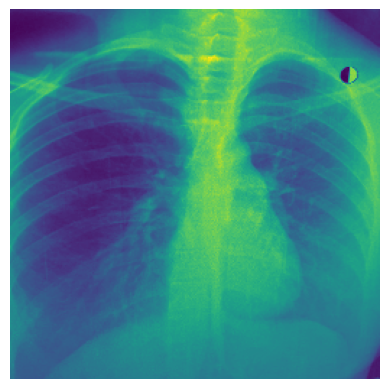

1/1 [==============================] - 0s 72ms/step
Covid


In [21]:
img=cv.imread("Covid19-dataset/test/Normal/shamamTest.jpeg")
img=cv.resize(img,[256,256])
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
p1=img.reshape(1,256,256)
print(img.shape)
plt.imshow(img)
plt.axis('off')  
plt.show()
arrayforouput=model.predict(p1)
classa=arrayforouput.argmax()
if(classa==0):
    print("Normal")
elif(classa==1):
    print("Covid")
else:
    print("Viral-Pneumonia")
    

In [23]:
model.save("Predict.h5")